In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df_ms = pd.read_csv("mrestate_data.csv")
df_sb = pd.read_csv("shabesh_data.csv")

In [124]:
df_ms.head(3)

,adv_date,area,build_year,city,description,facilities,floor,link,neighbour_hood,price,rooms,total_price
0,2022-26-12,118,1401,تهران,⭕فروش فوری آپارتمان فوق لوکس⭕ \r\n⛔فرصت بازدید...,پارکینگ/آسانسور/انباری/بالکن,2,https://www.mrestate.ir/s/oSucT,جنت آباد شمالی,"70,338,983",2,"8,300,000,000"
1,2022-26-12,65,1386,تهران,✔️ ۶۵ متر یک خوابه\r\n✔️ فول امکانات (پارکینگ ...,پارکینگ/آسانسور/انباری,3,https://www.mrestate.ir/s/SpJHh,کن,"40,615,384",1,"2,640,000,000"
2,2022-26-12,160,1401,تهران,♦️۱۶۰ متر \r\n♦️بهترین فرعی بلوار دریا \r\n♦️ف...,پارکینگ/آسانسور/انباری,2,https://www.mrestate.ir/s/ZcGTd,محله,"140,000,000",3,"22,400,000,000"


In [125]:
df_sb.columns

Index(['ac_sys', 'adv_date', 'area', 'bathroom_type', 'build_year',
       'building_facade', 'building_pos', 'city', 'description', 'facilities',
       'floor', 'floor_cover', 'heat_sys', 'houses_per_floor', 'link',
       'neighbour_hood', 'price', 'rooms', 'title_type', 'total_floors',
       'total_price', 'warm_water'],
      dtype='object')

In [126]:
df_ms.columns

Index(['adv_date', 'area', 'build_year', 'city', 'description', 'facilities',
       'floor', 'link', 'neighbour_hood', 'price', 'rooms', 'total_price'],
      dtype='object')

In [127]:
df_ms.drop(columns=["city"] , inplace= True)

In [128]:
df_ms.head()

,adv_date,area,build_year,description,facilities,floor,link,neighbour_hood,price,rooms,total_price
0,2022-26-12,118,1401,⭕فروش فوری آپارتمان فوق لوکس⭕ \r\n⛔فرصت بازدید...,پارکینگ/آسانسور/انباری/بالکن,2,https://www.mrestate.ir/s/oSucT,جنت آباد شمالی,"70,338,983",2,"8,300,000,000"
1,2022-26-12,65,1386,✔️ ۶۵ متر یک خوابه\r\n✔️ فول امکانات (پارکینگ ...,پارکینگ/آسانسور/انباری,3,https://www.mrestate.ir/s/SpJHh,کن,"40,615,384",1,"2,640,000,000"
2,2022-26-12,160,1401,♦️۱۶۰ متر \r\n♦️بهترین فرعی بلوار دریا \r\n♦️ف...,پارکینگ/آسانسور/انباری,2,https://www.mrestate.ir/s/ZcGTd,محله,"140,000,000",3,"22,400,000,000"
3,2022-26-12,68,1384,❌️فایل شخصی لطفا همکاران تماس نگیرند ❌️\r\n⚡️پ...,پارکینگ/انباری,1,https://www.mrestate.ir/s/SKdNF,محله,"62,500,000",2,"4,250,000,000"
4,2022-26-12,87,1400,پیشنهادی بینظیر برای سخت پسندان\r\n\r\nآپارتما...,NaN,1,https://www.mrestate.ir/s/SqhWA,جنت آباد مرکزی,"78,735,632",2,"6,850,000,000"


In [129]:
def to_int(col : pd.Series):
    if "," in col.iloc[0]:
        return col.apply(lambda x:int(x.replace("," , "")))

    else:
        return col.apply(lambda x: int(x))

In [130]:
df_ms.isna().sum()

adv_date            0
area                0
build_year          0
description         0
facilities        161
floor               0
link                0
neighbour_hood      0
price               0
rooms               0
total_price         0
dtype: int64

In [131]:
df_ms[df_ms["facilities"].isna()]

,adv_date,area,build_year,description,facilities,floor,link,neighbour_hood,price,rooms,total_price
4,2022-26-12,87,1400,پیشنهادی بینظیر برای سخت پسندان\r\n\r\nآپارتما...,NaN,1,https://www.mrestate.ir/s/SqhWA,جنت آباد مرکزی,"78,735,632",2,"6,850,000,000"
5,2022-26-12,124,1400,(124متر)\r\n[2خواب]\r\n{{امکانات:2پارکینگ+انبا...,NaN,3,https://www.mrestate.ir/s/IWiDl,جنت آباد مرکزی,"73,790,322",2,"9,150,000,000"
21,2022-26-12,64,1380,ساختمان جنوبی دونبش طبقه‌ ۴سندی ۳رویتی به آدرس...,NaN,4,https://www.mrestate.ir/s/trfzu,آبشار,"32,812,500",2,"2,100,000,000"
83,2022-26-12,55,1395,_ قولنامه‌ای با کد رهگیری \r\n_ فاصله تا تجریش...,NaN,3,https://www.mrestate.ir/s/zJqKM,نیاوران,"33,000,000",1,"1,815,000,000"
108,2022-26-12,55,1394,۵۵ متر/ تکخواب\r\nشخصی ساز \r\n۴ طبقه/ تکواحدی...,NaN,1,https://www.mrestate.ir/s/INDZS,پیروزی,"42,181,818",1,"2,320,000,000"
...,...,...,...,...,...,...,...,...,...,...,...
9085,2022-26-11,36,1385,✅️طبقه دوم سندی سوم رویتی ✅️\r\n\r\n\r\nفرصتی ...,NaN,2,https://www.mrestate.ir/s/pURFE,پیروزی,"30,555,555",1,"1,100,000,000"
9125,2022-26-11,55,1385,✅️۵۵متر طبقه ۲ خوش نقشه\r\n✅️باز سازی کامل\r\...,NaN,2,https://www.mrestate.ir/s/OxDPE,اوقاف,"35,454,545",1,"1,950,000,000"
9174,2022-26-11,86,1384,آپارتمان تخلیه ،نقاشی شده ،فاقد کابینت میباشد ...,NaN,3,https://www.mrestate.ir/s/BABJC,صفا,"26,744,186",2,"2,300,000,000"
9196,2022-26-11,62,1380,به نام خداوند رئوف \r\nعرض سلام و احترام\r\n\r...,NaN,2,https://www.mrestate.ir/s/LoIge,پیروزی,"34,000,000",1,"2,108,000,000"


In [132]:
df_ms.dtypes

adv_date          object
area               int64
build_year        object
description       object
facilities        object
floor              int64
link              object
neighbour_hood    object
price             object
rooms             object
total_price       object
dtype: object

In [133]:
index_to_drop = df_ms[df_ms["build_year"].apply(lambda x: "از" in x)].index

In [134]:
df_ms.drop(index_to_drop , axis= 0 , inplace= True)

In [135]:
index_to_drop = df_ms[df_ms["rooms"].apply(lambda x: "خواب" in x)].index
df_ms.drop(index_to_drop , axis= 0 , inplace= True)

In [136]:
for col_name in ["build_year" ,"price" ,  "rooms" ,"total_price" ]:
    try:
        df_ms[col_name] = to_int(df_ms[col_name])
    except:
        print(col_name)

In [137]:
df_ms["adv_date"] = pd.to_datetime(df_ms["adv_date"], format= "%Y-%d-%m")

In [138]:
df_ms.dtypes

adv_date          datetime64[ns]
area                       int64
build_year                 int64
description               object
facilities                object
floor                      int64
link                      object
neighbour_hood            object
price                      int64
rooms                      int64
total_price                int64
dtype: object

In [139]:
df_ms["facilities"].fillna("" , inplace=True)

In [157]:
all_facilities = "/".join(df_ms["facilities"])

In [158]:
facilitieslist_unique = list(set(all_facilities.split("/")))

In [159]:
facilitieslist_unique.pop(0)

''

In [160]:
facilitieslist_unique

['آبنما',
 'جاروبرقی مرکزی',
 'سونا',
 'نگهبانی',
 'سالن اجتماعات',
 'انباری',
 'جکوزی',
 'سرایداری',
 'استخر',
 'نورپردازی',
 'روف گاردن',
 'آلاچیق',
 'اعلام حریق',
 'پارکینگ',
 'لابی من',
 'بالکن',
 'آسانسور',
 'اطفا حریق',
 'باشگاه',
 'لابی',
 'پارکینگ مهمان']

In [161]:
facilitieslist_unique_en = ["Fountain" , "Central_vaccum" , "Sauna" , "Security" , "Party_room" , "Warehouse" , "Hot_tubb" , "Janitor" , "Pool" , "Lights" , "Roof_grnd" ,"Gazebo" , "Fire_detetor" ,"Parking" , "Lobby_man" , "Tercce" , "Elevator", "Fire_desabler", "Gym", 'Lobby', 'Guest_parking']

In [171]:
facilities_diction = dict()
for i in range(len(facilitieslist_unique)):
    facilities_diction[facilitieslist_unique[i]] = facilitieslist_unique_en[i]

In [172]:
facilities_diction

{'آبنما': 'Fountain',
 'جاروبرقی مرکزی': 'Central_vaccum',
 'سونا': 'Sauna',
 'نگهبانی': 'Security',
 'سالن اجتماعات': 'Party_room',
 'انباری': 'Warehouse',
 'جکوزی': 'Hot_tubb',
 'سرایداری': 'Janitor',
 'استخر': 'Pool',
 'نورپردازی': 'Lights',
 'روف گاردن': 'Roof_grnd',
 'آلاچیق': 'Gazebo',
 'اعلام حریق': 'Fire_detetor',
 'پارکینگ': 'Parking',
 'لابی من': 'Lobby_man',
 'بالکن': 'Tercce',
 'آسانسور': 'Elevator',
 'اطفا حریق': 'Fire_desabler',
 'باشگاه': 'Gym',
 'لابی': 'Lobby',
 'پارکینگ مهمان': 'Guest_parking'}

In [145]:
for f_uniq in facilitieslist_unique_en:
    df_ms[f_uniq] = pd.Series(dtype=np.int8)

In [154]:
for f_uniq in facilitieslist_unique_en:
    df_ms[f_uniq] = 0

In [151]:
df_ms.apply(lambda x: print(x["facilities"]),axis=1)

پارکینگ/آسانسور/انباری/بالکن
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/انباری


پارکینگ/انباری/بالکن/سرایداری/نگهبانی
پارکینگ/انباری/بالکن/سرایداری/نگهبانی
پارکینگ/آسانسور/انباری/بالکن/سرایداری/نگهبانی/سالن اجتماعات/لابی/استخر/سونا/جکوزی/روف گاردن/اعلام حریق/اطفا حریق/آبنما/لابی من/پارکینگ مهمان/نورپردازی/باشگاه/آلاچیق/جاروبرقی مرکزی
پارکینگ/آسانسور/انباری/بالکن
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور
پارکینگ/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری

پارکینگ/آسانسور/انباری
آسانسور
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری/بالکن/سرایداری/سالن اجتماعات/لابی/اعلام حریق/اطفا حریق/نورپردازی
پارکینگ/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/انباری
پارکینگ/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انباری
پارکینگ/آسانسور/انبار

0       None
1       None
2       None
3       None
4       None
        ... 
9301    None
9302    None
9303    None
9304    None
9305    None
Length: 9282, dtype: object

In [165]:
data_len = df_ms.shape[0]

In [175]:
for indx in range(data_len):
    facilities = df_ms.iloc[indx]["facilities"].split("/")
    # print(facilities)
    for facilitiy in facilities:
        if facilitiy:
            df_ms[facilities_diction[facilitiy]].iloc[indx] = 1
        

['پارکینگ', 'آسانسور', 'انباری', 'بالکن']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'انباری']
['']
['']
['پارکینگ', 'انباری', 'بالکن', 'سرایداری', 'نگهبانی']
['پارکینگ', 'انباری', 'بالکن', 'سرایداری', 'نگهبانی']
['پارکینگ', 'آسانسور', 'انباری', 'بالکن', 'سرایداری', 'نگهبانی', 'سالن اجتماعات', 'لابی', 'استخر', 'سونا', 'جکوزی', 'روف گاردن', 'اعلام حریق', 'اطفا حریق', 'آبنما', 'لابی من', 'پارکینگ مهمان', 'نورپردازی', 'باشگاه', 'آلاچیق', 'جاروبرقی مرکزی']
['پارکینگ', 'آسانسور', 'انباری', 'بالکن']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور']
['پارکینگ', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['']
['پارکینگ', 'آسانسور', 'انباری']
['آسانسور']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری', 'بالکن', 'سرایداری'

C:\Users\aminr\AppData\Local\Temp\ipykernel_10736\3832315124.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms[facilities_diction[facilitiy]].iloc[indx] = 1


['پارکینگ', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری', 'بالکن']
['انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسانسور', 'انباری']
['']
['پارکینگ', 'آسانسور', 'انباری']
['پارکینگ', 'آسان

In [178]:
df_ms.drop(["facilities"] , axis=1 , inplace= True)

In [188]:
df_ms.iloc[:,10:].sum().sort_values(ascending=False)

Warehouse         8649
Parking           8402
Elevator          7724
Tercce             712
Janitor            306
Fire_detetor       249
Fire_desabler      235
Lobby              195
Lights             188
Security           184
Guest_parking      159
Party_room         151
Lobby_man          140
Hot_tubb            99
Sauna               98
Roof_grnd           96
Gym                 88
Fountain            88
Pool                67
Central_vaccum      63
Gazebo              61
dtype: int64

In [190]:
df_ms[df_ms["Gazebo"]==1]

,adv_date,area,build_year,description,floor,link,neighbour_hood,price,rooms,total_price,...,Gazebo,Fire_detetor,Parking,Lobby_man,Tercce,Elevator,Fire_desabler,Gym,Lobby,Guest_parking
8,2022-12-26,85,1401,تهران,9,https://www.mrestate.ir/s/xmvRQ,تهرانپارس,12823529,2,1090000000,...,1,1,1,1,1,1,1,1,1,1
43,2022-12-26,125,1398,«آپارتمانی هوشمند ، لاکچری، با منظره و نقشه بی...,3,https://www.mrestate.ir/s/kyAev,شهرک - غرب,125040000,2,15630000000,...,1,1,1,1,1,1,1,1,0,1
51,2022-12-26,110,1401,تهران,10,https://www.mrestate.ir/s/sxnNz,دهکده المپیک,12818181,2,1410000000,...,1,1,1,1,1,1,1,1,1,1
392,2022-12-25,179,1401,⛔فوری ...,6,https://www.mrestate.ir/s/IbhVU,هروی,75000000,3,13425000000,...,1,1,1,1,1,1,1,1,1,1
584,2022-12-25,80,1399,دوخواب\r\nروبه آفتاب\r\nخوش نقشه\r\nپارکینگ.ان...,1,https://www.mrestate.ir/s/BoLCP,میرداماد,109375000,2,8750000000,...,1,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7625,2022-11-26,103,1401,🔥تا تنور گرم است، نان را بچسبان🔥\r\nسازه ای بی...,10,https://www.mrestate.ir/s/btiEb,نوبنیاد,86893203,2,8950000000,...,1,1,1,1,1,1,1,1,1,1
7737,2022-11-26,101,1401,✅ تعلل بیش از این جایز نیست !\r\n\r\n✅ تامل بی...,8,https://www.mrestate.ir/s/TbYev,پاسداران,79207920,2,8000000000,...,1,1,1,1,1,1,1,1,1,1
7886,2022-11-26,145,1401,املاک گل نرگس ۱۵متری دوم نبش خیابان ۲۲,5,https://www.mrestate.ir/s/tYMyR,افسریه,37931034,3,5500000000,...,1,1,1,0,1,1,1,0,1,0
8337,2022-11-26,110,1401,دریاچه چیتگر/دهکده المپیک,11,https://www.mrestate.ir/s/FNLnU,دریاچه خلیج فارس,30000000,2,3300000000,...,1,1,1,1,1,1,1,1,1,1


In [192]:
df_ms.describe()

,area,build_year,floor,price,rooms,total_price,Fountain,Central_vaccum,Sauna,Security,...,Gazebo,Fire_detetor,Parking,Lobby_man,Tercce,Elevator,Fire_desabler,Gym,Lobby,Guest_parking
count,9282.000000,9282.000000,9282.000000,9.282000e+03,9282.000000,9.282000e+03,9282.000000,9282.000000,9282.000000,9282.000000,...,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000,9282.000000
mean,119.550851,1392.395281,3.662034,8.541222e+07,2.211485,1.190722e+10,0.009481,0.006787,0.010558,0.019823,...,0.006572,0.026826,0.905193,0.015083,0.076708,0.832148,0.025318,0.009481,0.021008,0.017130
std,194.768746,7.807019,3.318051,1.211596e+09,0.722732,1.974136e+11,0.096912,0.082110,0.102214,0.139400,...,0.080805,0.161584,0.292964,0.121890,0.266141,0.373755,0.157097,0.096912,0.143420,0.129763
min,1.000000,1370.000000,1.000000,8.432200e+05,1.000000,9.950000e+07,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,1386.000000,2.000000,4.926470e+07,2.000000,4.000000e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,104.000000,1394.000000,3.000000,6.417910e+07,2.000000,6.300000e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,135.000000,1400.000000,4.000000,8.156028e+07,3.000000,1.050000e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,15555.000000,1402.000000,30.000000,1.162577e+11,9.000000,1.895000e+13,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
df_ms[df_ms["area"] > 500]

,adv_date,area,build_year,description,floor,link,neighbour_hood,price,rooms,total_price,...,Gazebo,Fire_detetor,Parking,Lobby_man,Tercce,Elevator,Fire_desabler,Gym,Lobby,Guest_parking
78,2022-12-26,530,1401,⚜️️تمامی واحدهای لوکس و لاکچری منطقه یک را با ...,3,https://www.mrestate.ir/s/jZFet,زعفرانیه,203773584,4,108000000000,...,0,0,1,0,0,1,0,0,0,0
120,2022-12-26,750,1401,فروش بصورت یکجا\r\nواحدهای ۱۵۰ متری ۳ خواب با ...,5,https://www.mrestate.ir/s/tpSTa,جنت آباد شمالی,76000000,3,57000000000,...,0,0,1,0,0,1,0,0,0,0
412,2022-12-25,670,1401,✅اکازیون فروش پنت هاووس✅\r\n✅٦٧٠متر بی نظیر در...,12,https://www.mrestate.ir/s/xJLsx,محله,350000000,4,234500000000,...,0,0,1,0,0,1,0,0,0,0
705,2022-12-23,650,1401,فروش \r\nو معاوضه با کلنگی,5,https://www.mrestate.ir/s/BcoHI__9,شهرک - غرب,128461538,3,83500000000,...,0,0,1,0,1,1,0,0,0,0
1215,2022-12-22,530,1400,➕️...\r\nol\r\n:\r\n‎⚜️کارگزاری املاک آداک فرش...,3,https://www.mrestate.ir/s/nANwQ,محله,269811320,4,143000000000,...,0,0,1,0,0,1,0,0,0,0
1351,2022-12-21,970,1401,دزاشیب \r\n\r\n۱۰۵و۱۰۸متر ۲خواب \r\n\r\nفروش ی...,5,https://www.mrestate.ir/s/LiVqG,دزاشیب,103092783,2,100000000000,...,0,0,1,0,0,1,0,0,0,0
1368,2022-12-21,1533,1397,❌❌ویلاشهرکی دوبلکس❌❌\r\n⚠️فروش و تهاتر با آپار...,2,https://www.mrestate.ir/s/OUlal,قنات کوثر,14024787,2,21500000000,...,0,0,1,0,0,0,0,0,0,0
1371,2022-12-21,520,1400,️ ❎ فروش پایان معامله نیست آغاز تعهد ماست ❎...,3,https://www.mrestate.ir/s/pigAP,اقدسیه,320000000,4,166400000000,...,0,0,1,0,0,1,0,0,0,0
1547,2022-12-21,890,1399,کل آپارتمان به صورت یکجا بفروش میرسد مناسب برا...,1,https://www.mrestate.ir/s/RomuP,جمهوری,31460674,2,28000000000,...,0,0,1,0,0,1,0,0,0,0
2042,2022-12-19,2200,1401,لوکیشن عالی از نظر دسترسی و سازه\r\n\r\nسند تک...,6,https://www.mrestate.ir/s/bSHGZ,زعفرانیه,145454545,4,320000000000,...,0,0,1,0,0,1,0,0,0,0


## Shabesh data cleaning

In [195]:
df_sb.columns

Index(['ac_sys', 'adv_date', 'area', 'bathroom_type', 'build_year',
       'building_facade', 'building_pos', 'city', 'description', 'facilities',
       'floor', 'floor_cover', 'heat_sys', 'houses_per_floor', 'link',
       'neighbour_hood', 'price', 'rooms', 'title_type', 'total_floors',
       'total_price', 'warm_water'],
      dtype='object')

In [201]:
df_sb.drop(["ac_sys" , "bathroom_type" , "building_facade" , "building_pos" , "city" , "floor_cover" ,"heat_sys" , "houses_per_floor" , "title_type" ,"total_floors" , "warm_water" ] , axis=1 , inplace= True)

In [202]:
df_sb

,adv_date,area,build_year,description,facilities,floor,link,neighbour_hood,price,rooms,total_price
0,2022-07-12,136,1401,امیرآباد کردستان یکی از بهترین فرعی های منطقه\...,پارکینگ/آسانسور/لابی/انباری/سالن اجتماعات/تهوی...,4,https://www.shabesh.com/announce/2282875/%D9%8...,امیرآباد تهران,"91,900,000",3,"12,500,000,000"
1,2022-07-12,135,1401,امیرآباد کردستان فرعی دنج\r\nتاپ لوکیشن\r\n135...,آسانسور/پارکینگ/لابی/انباری/تهویه هوا/روف گارد...,2,https://www.shabesh.com/announce/2282877/%D9%8...,امیرآباد تهران,"100,000,000",3,"13,500,000,000"
2,2022-07-12,117,1394,یوسف آباد دسترسی عالی فرعی دنج\r\nتاپ لوکیشن\r...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,4,https://www.shabesh.com/announce/2283450/%D9%8...,یوسف آباد تهران,"78,600,000",2,"9,200,000,000"
3,2022-07-12,90,1400,امیرآباد کردستان فرعی دنج\r\n تاپ لوکیشن\r\n90...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,3,https://www.shabesh.com/announce/2282881/%D9%8...,امیرآباد تهران,"90,000,000",2,"8,100,000,000"
4,2022-14-12,135,1401,عمارتی بی همتا و لاکچری در قلب تاپ ترین لوکیشن...,پارکینگ/آسانسور/لابی/انباری/سونا و جکوزی/تهویه...,5,https://www.shabesh.com/announce/2275124/%D9%8...,فرمانیه تهران,"150,000,000",3,"20,250,000,000"
...,...,...,...,...,...,...,...,...,...,...,...
7351,2022-08-12,83,1401,فروش آپارتمان83 متری2خوابه در اختیاریه\r\nقیمت...,پارکینگ/آسانسور/انباری/بالکن/سرایدار/حیاط/درب ...,2,https://www.shabesh.com/announce/2283520/%D9%8...,اختیاریه تهران,"94,000,000",2,"7,800,000,000"
7352,2022-08-12,93,1399,امیرآباد کردستان فرعی دنج\r\nتاپ لوکیشن\r\n93 ...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,1,https://www.shabesh.com/announce/2283417/%D9%8...,امیرآباد تهران,"91,400,000",2,"8,500,000,000"
7353,2022-08-12,56,1379,فروش واحد 56 متری در دولت / دیباجی\r\r\nبازساز...,پنجره دو جداره/آیفون تصویری/درب ضد سرقت/بازساز...,2,https://www.shabesh.com/announce/2283145/%D9%8...,دولت تهران,"60,700,000",1,"3,400,000,000"
7354,2022-08-12,115,1400,ابن سینا فرعی دنج\r\nمنطقه ی آرام تاپ لوکیشن\r...,پارکینگ/آسانسور/لابی/انباری/سالن اجتماعات/تهوی...,2,https://www.shabesh.com/announce/2283546/%D9%8...,یوسف آباد تهران,"97,000,000",2,"11,150,000,000"


In [197]:
df_sb["facilities"]

0       پارکینگ/آسانسور/لابی/انباری/سالن اجتماعات/تهوی...
1       آسانسور/پارکینگ/لابی/انباری/تهویه هوا/روف گارد...
2       پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...
3       پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...
4       پارکینگ/آسانسور/لابی/انباری/سونا و جکوزی/تهویه...
                              ...                        
7351    پارکینگ/آسانسور/انباری/بالکن/سرایدار/حیاط/درب ...
7352    پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...
7353    پنجره دو جداره/آیفون تصویری/درب ضد سرقت/بازساز...
7354    پارکینگ/آسانسور/لابی/انباری/سالن اجتماعات/تهوی...
7355            پارکینگ/آسانسور/بالکن/آیفون تصویری/انباری
Name: facilities, Length: 7356, dtype: object

In [204]:
df_sb["facilities"].fillna("" , inplace=True)

In [205]:
all_facilities = "/".join(df_sb["facilities"])

In [206]:
facilitieslist_unique = list(set(all_facilities.split("/")))

In [210]:
facilitieslist_unique

['وامدار',
 '',
 'دزدگیر',
 'پنجره دو جداره',
 'سیستم اطفا حریق',
 'سالن اجتماعات',
 'موقعیت اداری',
 'انباری',
 'تهویه هوا',
 'پیش فروش',
 'مال',
 'سونا و جکوزی',
 'درب ضد سرقت',
 'استخر',
 'روف گاردن',
 'باربیکیو',
 'مشارکتی',
 'گرمایش مرکزی',
 'آیفون تصویری',
 'بازسازی شده',
 'درب ریموت',
 'معاوضه',
 'پارکینگ',
 'فرنیش',
 'قدرالسهم',
 'حیاط',
 'بالکن',
 'شوتینگ زباله',
 'سالن ورزشی',
 'آسانسور',
 'سرایدار',
 'قابل تبدیل',
 'لابی']

In [214]:
facilitieslist_unique = ["سیستم اطفا حریق" , "سالن اجتماعات" , "انباری" , "سونا و جکوزی","استخر" ,"روف گاردن" ,"پارکینگ" ,"آسانسور" , "سرایدار" , "لابی"]

In [215]:
facilitieslist_unique_en = ["Fire_desabler", "Party_room" ,  "Warehouse","Sauna", "Pool" , "Roof_grnd" , "Parking","Elevator", "Janitor" , 'Lobby']

In [216]:
facilities_diction = dict()
for i in range(len(facilitieslist_unique)):
    facilities_diction[facilitieslist_unique[i]] = facilitieslist_unique_en[i]

In [217]:
facilities_diction

{'سیستم اطفا حریق': 'Fire_desabler',
 'سالن اجتماعات': 'Party_room',
 'انباری': 'Warehouse',
 'سونا و جکوزی': 'Sauna',
 'استخر': 'Pool',
 'روف گاردن': 'Roof_grnd',
 'پارکینگ': 'Parking',
 'آسانسور': 'Elevator',
 'سرایدار': 'Janitor',
 'لابی': 'Lobby'}

In [220]:
for f_uniq in facilitieslist_unique_en:
    df_sb[f_uniq] = pd.Series(dtype=np.int8)

In [221]:
for f_uniq in facilitieslist_unique_en:
    df_sb[f_uniq] = 0

In [222]:
data_len = df_sb.shape[0]

In [224]:
for indx in range(data_len):
    facilities = df_sb.iloc[indx]["facilities"].split("/")
    # print(facilities)
    for facilitiy in facilities:
        if facilitiy in facilities_diction.keys():
            df_sb[facilities_diction[facilitiy]].iloc[indx] = 1
        

C:\Users\aminr\AppData\Local\Temp\ipykernel_10736\3869535725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sb[facilities_diction[facilitiy]].iloc[indx] = 1


In [225]:
df_sb

,adv_date,area,build_year,description,facilities,floor,link,neighbour_hood,price,rooms,...,Fire_desabler,Party_room,Warehouse,Sauna,Pool,Roof_grnd,Parking,Elevator,Janitor,Lobby
0,2022-07-12,136,1401,امیرآباد کردستان یکی از بهترین فرعی های منطقه\...,پارکینگ/آسانسور/لابی/انباری/سالن اجتماعات/تهوی...,4,https://www.shabesh.com/announce/2282875/%D9%8...,امیرآباد تهران,"91,900,000",3,...,1,1,1,0,0,1,1,1,0,1
1,2022-07-12,135,1401,امیرآباد کردستان فرعی دنج\r\nتاپ لوکیشن\r\n135...,آسانسور/پارکینگ/لابی/انباری/تهویه هوا/روف گارد...,2,https://www.shabesh.com/announce/2282877/%D9%8...,امیرآباد تهران,"100,000,000",3,...,1,0,1,0,0,1,1,1,0,1
2,2022-07-12,117,1394,یوسف آباد دسترسی عالی فرعی دنج\r\nتاپ لوکیشن\r...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,4,https://www.shabesh.com/announce/2283450/%D9%8...,یوسف آباد تهران,"78,600,000",2,...,1,0,1,0,0,1,1,1,0,1
3,2022-07-12,90,1400,امیرآباد کردستان فرعی دنج\r\n تاپ لوکیشن\r\n90...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,3,https://www.shabesh.com/announce/2282881/%D9%8...,امیرآباد تهران,"90,000,000",2,...,1,0,1,0,0,1,1,1,1,1
4,2022-14-12,135,1401,عمارتی بی همتا و لاکچری در قلب تاپ ترین لوکیشن...,پارکینگ/آسانسور/لابی/انباری/سونا و جکوزی/تهویه...,5,https://www.shabesh.com/announce/2275124/%D9%8...,فرمانیه تهران,"150,000,000",3,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,2022-08-12,83,1401,فروش آپارتمان83 متری2خوابه در اختیاریه\r\nقیمت...,پارکینگ/آسانسور/انباری/بالکن/سرایدار/حیاط/درب ...,2,https://www.shabesh.com/announce/2283520/%D9%8...,اختیاریه تهران,"94,000,000",2,...,1,0,1,0,0,0,1,1,1,0
7352,2022-08-12,93,1399,امیرآباد کردستان فرعی دنج\r\nتاپ لوکیشن\r\n93 ...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,1,https://www.shabesh.com/announce/2283417/%D9%8...,امیرآباد تهران,"91,400,000",2,...,1,0,1,0,0,1,1,1,0,1
7353,2022-08-12,56,1379,فروش واحد 56 متری در دولت / دیباجی\r\r\nبازساز...,پنجره دو جداره/آیفون تصویری/درب ضد سرقت/بازساز...,2,https://www.shabesh.com/announce/2283145/%D9%8...,دولت تهران,"60,700,000",1,...,0,0,0,0,0,0,0,0,0,0
7354,2022-08-12,115,1400,ابن سینا فرعی دنج\r\nمنطقه ی آرام تاپ لوکیشن\r...,پارکینگ/آسانسور/لابی/انباری/سالن اجتماعات/تهوی...,2,https://www.shabesh.com/announce/2283546/%D9%8...,یوسف آباد تهران,"97,000,000",2,...,1,1,1,0,0,1,1,1,1,1


In [227]:
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7356 entries, 0 to 7355
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   adv_date        7356 non-null   object
 1   area            7356 non-null   int64 
 2   build_year      7356 non-null   int64 
 3   description     7356 non-null   object
 4   facilities      7356 non-null   object
 5   floor           7356 non-null   object
 6   link            7356 non-null   object
 7   neighbour_hood  7356 non-null   object
 8   price           7356 non-null   object
 9   rooms           7356 non-null   int64 
 10  total_price     7356 non-null   object
 11  Fire_desabler   7356 non-null   int64 
 12  Party_room      7356 non-null   int64 
 13  Warehouse       7356 non-null   int64 
 14  Sauna           7356 non-null   int64 
 15  Pool            7356 non-null   int64 
 16  Roof_grnd       7356 non-null   int64 
 17  Parking         7356 non-null   int64 
 18  Elevator

In [235]:
index_to_drop = df_sb[df_sb["price"] == "رهن"].index
df_sb.drop(index_to_drop , axis=0 , inplace= True)

In [260]:
df_sb.loc[df_sb[df_sb["floor"] == "همکف"].index , "floor"] = "0"
df_sb.loc[df_sb[df_sb["floor"] == "زیرهمکف"].index , "floor"] = "-1"
df_sb.loc[df_sb[df_sb["floor"] == "بیشتر از 30"].index , "floor"] = "30"

In [274]:
for col_name in ["floor" ,"price" , "total_price"  ]:
    try:
        df_sb[col_name] = to_int(df_sb[col_name])
    except:
        print(col_name)

price
total_price


In [237]:
df_sb["total_price"] = to_int(df_sb["total_price"])

TypeError: argument of type 'numpy.int64' is not iterable

In [275]:
df_sb.dtypes

adv_date          object
area               int64
build_year         int64
description       object
facilities        object
floor              int64
link              object
neighbour_hood    object
price              int64
rooms              int64
total_price        int64
Fire_desabler      int64
Party_room         int64
Warehouse          int64
Sauna              int64
Pool               int64
Roof_grnd          int64
Parking            int64
Elevator           int64
Janitor            int64
Lobby              int64
dtype: object

In [281]:
df_sb["adv_date"] = pd.to_datetime(df_sb["adv_date"] , format= "%Y-%d-%m")

In [282]:
df_ms

,adv_date,area,build_year,description,floor,link,neighbour_hood,price,rooms,total_price,...,Gazebo,Fire_detetor,Parking,Lobby_man,Tercce,Elevator,Fire_desabler,Gym,Lobby,Guest_parking
0,2022-12-26,118,1401,⭕فروش فوری آپارتمان فوق لوکس⭕ \r\n⛔فرصت بازدید...,2,https://www.mrestate.ir/s/oSucT,جنت آباد شمالی,70338983,2,8300000000,...,0,0,1,0,1,1,0,0,0,0
1,2022-12-26,65,1386,✔️ ۶۵ متر یک خوابه\r\n✔️ فول امکانات (پارکینگ ...,3,https://www.mrestate.ir/s/SpJHh,کن,40615384,1,2640000000,...,0,0,1,0,0,1,0,0,0,0
2,2022-12-26,160,1401,♦️۱۶۰ متر \r\n♦️بهترین فرعی بلوار دریا \r\n♦️ف...,2,https://www.mrestate.ir/s/ZcGTd,محله,140000000,3,22400000000,...,0,0,1,0,0,1,0,0,0,0
3,2022-12-26,68,1384,❌️فایل شخصی لطفا همکاران تماس نگیرند ❌️\r\n⚡️پ...,1,https://www.mrestate.ir/s/SKdNF,محله,62500000,2,4250000000,...,0,0,1,0,0,0,0,0,0,0
4,2022-12-26,87,1400,پیشنهادی بینظیر برای سخت پسندان\r\n\r\nآپارتما...,1,https://www.mrestate.ir/s/SqhWA,جنت آباد مرکزی,78735632,2,6850000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9301,2022-11-26,58,1391,✳️۵۸ متر\r\n.\r\n✳️طبقه دوم\r\n.\r\n✳️۱ خواب \...,2,https://www.mrestate.ir/s/Smiua,شهران,67241379,1,3900000000,...,0,0,1,0,0,0,0,0,0,0
9302,2022-11-26,106,1397,با سلام و درود فراوان\r\n\r\n⚜️ بهترین لوکیشن ...,1,https://www.mrestate.ir/s/hxQfz,شاهین,62264150,2,6600000000,...,0,0,1,0,0,1,0,0,0,0
9303,2022-11-26,50,1391,باسلام\r\n****** املاک بزرگ دیجیتال شرق*******...,4,https://www.mrestate.ir/s/IHanF,تهرانپارس,43400000,1,2170000000,...,0,0,0,0,0,1,0,0,0,0
9304,2022-11-26,60,1389,املاک بزرگ آرکا جنت آباد جنوبی\r\n\r\nملک مورد...,3,https://www.mrestate.ir/s/TOpmh,شهرک نفت,51333333,1,3080000000,...,0,0,1,0,1,0,0,0,0,0


In [283]:
df_sb

,adv_date,area,build_year,description,facilities,floor,link,neighbour_hood,price,rooms,...,Fire_desabler,Party_room,Warehouse,Sauna,Pool,Roof_grnd,Parking,Elevator,Janitor,Lobby
0,2022-12-07,136,1401,امیرآباد کردستان یکی از بهترین فرعی های منطقه\...,پارکینگ/آسانسور/لابی/انباری/سالن اجتماعات/تهوی...,4,https://www.shabesh.com/announce/2282875/%D9%8...,امیرآباد تهران,91900000,3,...,1,1,1,0,0,1,1,1,0,1
1,2022-12-07,135,1401,امیرآباد کردستان فرعی دنج\r\nتاپ لوکیشن\r\n135...,آسانسور/پارکینگ/لابی/انباری/تهویه هوا/روف گارد...,2,https://www.shabesh.com/announce/2282877/%D9%8...,امیرآباد تهران,100000000,3,...,1,0,1,0,0,1,1,1,0,1
2,2022-12-07,117,1394,یوسف آباد دسترسی عالی فرعی دنج\r\nتاپ لوکیشن\r...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,4,https://www.shabesh.com/announce/2283450/%D9%8...,یوسف آباد تهران,78600000,2,...,1,0,1,0,0,1,1,1,0,1
3,2022-12-07,90,1400,امیرآباد کردستان فرعی دنج\r\n تاپ لوکیشن\r\n90...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,3,https://www.shabesh.com/announce/2282881/%D9%8...,امیرآباد تهران,90000000,2,...,1,0,1,0,0,1,1,1,1,1
4,2022-12-14,135,1401,عمارتی بی همتا و لاکچری در قلب تاپ ترین لوکیشن...,پارکینگ/آسانسور/لابی/انباری/سونا و جکوزی/تهویه...,5,https://www.shabesh.com/announce/2275124/%D9%8...,فرمانیه تهران,150000000,3,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,2022-12-08,83,1401,فروش آپارتمان83 متری2خوابه در اختیاریه\r\nقیمت...,پارکینگ/آسانسور/انباری/بالکن/سرایدار/حیاط/درب ...,2,https://www.shabesh.com/announce/2283520/%D9%8...,اختیاریه تهران,94000000,2,...,1,0,1,0,0,0,1,1,1,0
7352,2022-12-08,93,1399,امیرآباد کردستان فرعی دنج\r\nتاپ لوکیشن\r\n93 ...,پارکینگ/آسانسور/لابی/انباری/تهویه هوا/روف گارد...,1,https://www.shabesh.com/announce/2283417/%D9%8...,امیرآباد تهران,91400000,2,...,1,0,1,0,0,1,1,1,0,1
7353,2022-12-08,56,1379,فروش واحد 56 متری در دولت / دیباجی\r\r\nبازساز...,پنجره دو جداره/آیفون تصویری/درب ضد سرقت/بازساز...,2,https://www.shabesh.com/announce/2283145/%D9%8...,دولت تهران,60700000,1,...,0,0,0,0,0,0,0,0,0,0
7354,2022-12-08,115,1400,ابن سینا فرعی دنج\r\nمنطقه ی آرام تاپ لوکیشن\r...,پارکینگ/آسانسور/لابی/انباری/سالن اجتماعات/تهوی...,2,https://www.shabesh.com/announce/2283546/%D9%8...,یوسف آباد تهران,97000000,2,...,1,1,1,0,0,1,1,1,1,1


In [289]:
df_ms["facilities"] = pd.read_csv("mrestate_data.csv")["facilities"]

In [292]:
df = pd.concat([df_ms , df_sb ],axis=0 )

In [293]:
df.columns

Index(['adv_date', 'area', 'build_year', 'description', 'floor', 'link',
       'neighbour_hood', 'price', 'rooms', 'total_price', 'Fountain',
       'Central_vaccum', 'Sauna', 'Security', 'Party_room', 'Warehouse',
       'Hot_tubb', 'Janitor', 'Pool', 'Lights', 'Roof_grnd', 'Gazebo',
       'Fire_detetor', 'Parking', 'Lobby_man', 'Tercce', 'Elevator',
       'Fire_desabler', 'Gym', 'Lobby', 'Guest_parking', 'facilities'],
      dtype='object')

In [295]:
df = df[['adv_date', 'area', 'build_year', 'description', 'facilities', 'floor', 'link',
       'neighbour_hood',  'rooms', 'Fountain',
       'Central_vaccum', 'Sauna', 'Security', 'Party_room', 'Warehouse',
       'Hot_tubb', 'Janitor', 'Pool', 'Lights', 'Roof_grnd', 'Gazebo',
       'Fire_detetor', 'Parking', 'Lobby_man', 'Tercce', 'Elevator',
       'Fire_desabler', 'Gym', 'Lobby', 'Guest_parking' ,'price', 'total_price']]

In [296]:
df.to_csv("almost_total_data.csv" , index= False)

In [298]:
df = pd.read_csv("almost_total_data.csv")

In [299]:
df.head(2)

,adv_date,area,build_year,description,facilities,floor,link,neighbour_hood,rooms,Fountain,...,Parking,Lobby_man,Tercce,Elevator,Fire_desabler,Gym,Lobby,Guest_parking,price,total_price
0,2022-12-26,118,1401,⭕فروش فوری آپارتمان فوق لوکس⭕ \r\n⛔فرصت بازدید...,پارکینگ/آسانسور/انباری/بالکن,2,https://www.mrestate.ir/s/oSucT,جنت آباد شمالی,2,0.0,...,1,0.0,1.0,1,0,0.0,0,0.0,70338983,8300000000
1,2022-12-26,65,1386,✔️ ۶۵ متر یک خوابه\r\n✔️ فول امکانات (پارکینگ ...,پارکینگ/آسانسور/انباری,3,https://www.mrestate.ir/s/SpJHh,کن,1,0.0,...,1,0.0,0.0,1,0,0.0,0,0.0,40615384,2640000000


C:\Users\aminr\AppData\Local\Temp\ipykernel_10736\572562680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr() ,cmap="Blues" ,vmax=0.1)


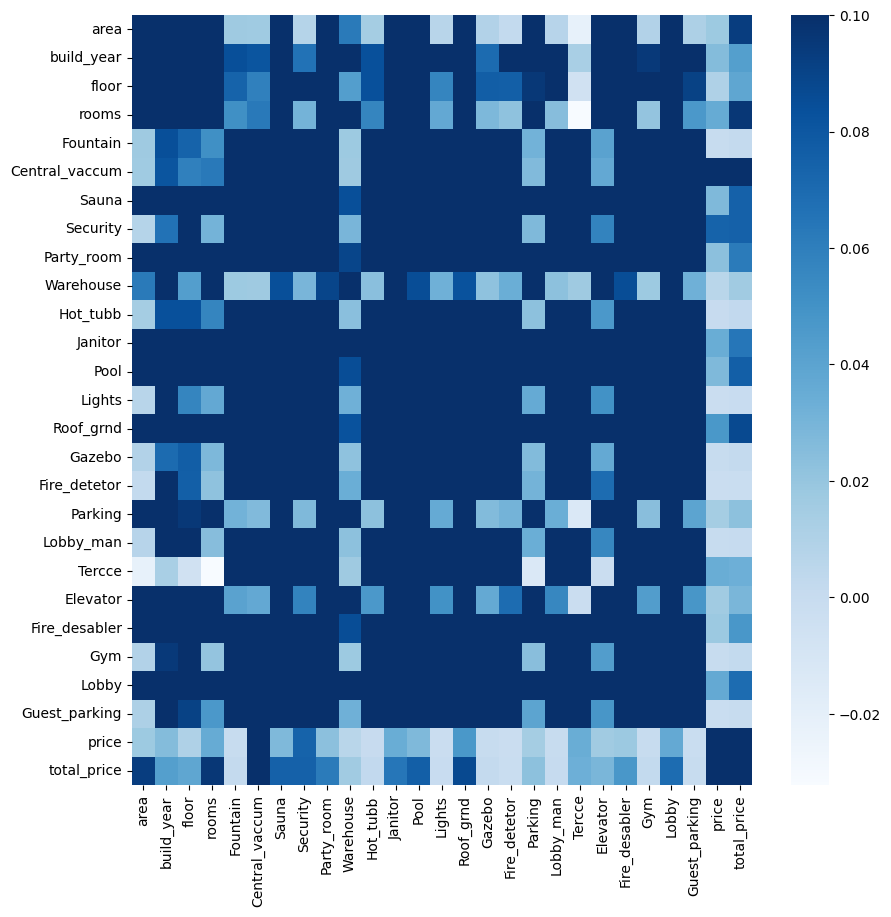

In [308]:
plt.subplots(1,1,figsize = (10,10) )
ax = sns.heatmap(df.corr() ,cmap="Blues" ,vmax=0.1)